# Test Real Data

In [1]:
import sys
sys.path.insert(0, 'C:\\Users\\gauthieca\\Desktop\\Code_ Thèse\\bandits-to-rank')

In [2]:
from bandits_to_rank.bandits import *
from bandits_to_rank.environment import *
from bandits_to_rank.referee import *
from bandits_to_rank.opponents import oracle,random_player,greedy,bc_mpts
from bandits_to_rank.opponents.pbm_ts import *
from bandits_to_rank.sampling.pbm_inference import *


import time
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import floor, log
from random import shuffle
from copy import deepcopy


%reload_ext autoreload
%autoreload 2 

In [3]:
def time_sec_to_HMS(sec):
    heure=sec//3600
    rest_h=sec%3600
    minute=rest_h//60
    rest_m=rest_h%60

    return(str(int(heure))+'H '+str(int(minute))+'min '+str(int(rest_m))+'sec')

In [4]:
with open('param_KDD.txt', 'r') as file:
    dict_theta_query=json.load(file)

In [5]:
queries =dict_theta_query.keys()
thetas_KDD=[]
kappas_KDD=[]
for query in queries:
    thetas_KDD.append(dict_theta_query[query]['thetas'])
    kappas_KDD.append(dict_theta_query[query]['kappas'])
    

In [ ]:
print(len(thetas_KDD[0]))
print(len(kappas_KDD[0]))

5
3


In [18]:
for i in queries:
    print (i)
    dict_theta_query[i]['thetas'].sort()
    dict_theta_query[i]['kappas'].sort(reverse=True)
    print('min_theta', round(dict_theta_query[i]['thetas'][0],3))
    print('max_theta', round(dict_theta_query[i]['thetas'][-1],3))
    print('theta', dict_theta_query[i]['thetas'])
    print ('kappa2',round(dict_theta_query[i]['kappas'][1],3))
    print ('kappa3',round(dict_theta_query[i]['kappas'][2],3))



19
min_theta 0.031
max_theta 0.05
theta [0.030629107242356162, 0.03430311957880712, 0.036602165932245315, 0.04669622534961218, 0.04998115200718376]
kappa2 0.486
kappa3 0.33
2
min_theta 0.016
max_theta 0.077
theta [0.016282720520416426, 0.018121746359756177, 0.01827178757558634, 0.02353305657790025, 0.07734856183748726]
kappa2 0.503
kappa3 0.403
10
min_theta 0.004
max_theta 0.148
theta [0.004398044587847975, 0.013119969501046307, 0.039165307602481596, 0.0739868806137541, 0.11481401719638429, 0.14847462536579176]
kappa2 0.411
kappa3 0.275
9
min_theta 0.017
max_theta 0.069
theta [0.017378239524063456, 0.02284041243892426, 0.03836948985880075, 0.04024562589619809, 0.06149888422426908, 0.06870495493362541]
kappa2 0.546
kappa3 0.529
7
min_theta 0.025
max_theta 0.067
theta [0.024656101028562114, 0.025341272333348094, 0.026069485537007244, 0.04198094853055038, 0.04643163870552662, 0.06674437580594327]
kappa2 0.491
kappa3 0.345
8
min_theta 0.108
max_theta 0.146
theta [0.10810529433197942, 0.110

In [7]:
#### Not from KDD
thetas=[[0.3,0.2,0.6,0.1,0.03,0.4], 
       [0.13,0.25,0.46,0.31,0.93,0.34],
       [0.33,0.21,0.76,0.61,0.38,0.4],[1,1,0.76,1,1,1]]
kappas = [[1,0.3,0.2],
        [1,0.3,0.2],
        [1,0.3,0.2],
        [1,0.3,0.5]]

In [ ]:
query_propose =[i for i in range(len(thetas_KDD))]

In [ ]:
nb_game_per_query =20
nb_game = len(query_propose)*nb_game_per_query
nb_trial =5000

In [ ]:
pas = 10
env = Environment_KDD(thetas_KDD,kappas_KDD)


In [ ]:

referee_Oracle_5000trials_20games_thetas1 = Referee(env,nb_trial)
referee_Random_5000trials_20games_thetas1 = Referee(env,nb_trial)

referee_greedy_5000trials_20games_thetas1  = Referee(env,nb_trial)
referee_greedy_EGreedy_100_5000trials_20games_thetas1 = Referee(env,nb_trial)
referee_greedy_EGreedy_10_5000trials_20games_thetas1= Referee(env,nb_trial)

referee_BC_MPTS_triche_5000trials_20games_thetas1  = Referee(env,nb_trial)
referee_BC_MPTS_greedy_5000trials_20games_thetas1 = Referee(env,nb_trial)

#referee_TSMH_base_1_5000trials_20games_thetas1  = Referee(env,nb_trial)
referee_TSMH_kappa_desord_1_5000trials_20games_thetas1  = Referee(env,nb_trial)


In [ ]:
query_per_game =(sample(query_propose*int(nb_game/len(query_propose)), nb_game))

In [39]:
print (query_per_game)

[6, 2, 4, 1, 4, 7, 1, 4, 1, 4, 1, 3, 4, 6, 0, 2, 6, 6, 5, 4, 2, 7, 0, 2, 1, 0, 4, 1, 6, 1, 1, 3, 3, 2, 2, 5, 7, 2, 6, 5, 5, 5, 0, 4, 7, 2, 1, 5, 5, 1, 0, 7, 1, 1, 2, 6, 7, 5, 7, 0, 0, 2, 3, 4, 4, 7, 3, 5, 5, 2, 7, 2, 5, 3, 3, 0, 6, 6, 6, 6, 6, 0, 4, 0, 0, 7, 3, 6, 0, 4, 5, 1, 7, 0, 1, 3, 2, 1, 2, 2, 7, 4, 2, 3, 5, 4, 7, 1, 0, 0, 3, 2, 3, 2, 5, 7, 5, 7, 4, 7, 6, 5, 2, 4, 7, 2, 4, 0, 6, 3, 1, 3, 3, 0, 4, 5, 7, 4, 3, 1, 5, 6, 6, 7, 3, 4, 0, 3, 6, 0, 7, 6, 1, 5, 5, 1, 6, 0, 3, 3]


In [ ]:
start = time.time()
n_MAJ =1
for i in range(nb_game):
    query = query_per_game[i]
    #print (query)
    #print ('#### game '+str(i))
    #### Reboot player
    nb_prop,nb_place =env.get_setting(query)
    player_Oracle = oracle.Oracle(env.get_best_index(query))
    player_Random = random_player.Random(nb_prop,nb_place)


    player_greedy = greedy.greedy(nb_prop,nb_place,n_MAJ)
    player_greedy_EGreedy_10 =  greedy.greedy_EGreedy(10,nb_prop,nb_place,n_MAJ)
    player_greedy_EGreedy_100 =  greedy.greedy_EGreedy(100,nb_prop,nb_place,n_MAJ)


    player_BC_MPTS_triche = bc_mpts.BC_MPTS_triche(nb_prop,nb_place,kappas_KDD[query])
    player_BC_MPTS_greedy = bc_mpts.BC_MPTS_greedy(nb_prop,nb_place,n_MAJ)    
    
    #### Play game
    referee_Oracle_5000trials_20games_thetas1.play_game(player_Oracle,query)
    referee_Random_5000trials_20games_thetas1.play_game(player_Random,query)
    
    referee_greedy_5000trials_20games_thetas1.play_game(player_greedy,query)
    referee_greedy_EGreedy_100_5000trials_20games_thetas1.play_game(player_greedy_EGreedy_100,query)
    referee_greedy_EGreedy_10_5000trials_20games_thetas1.play_game(player_greedy_EGreedy_10,query)
    
    referee_BC_MPTS_triche_5000trials_20games_thetas1.play_game(player_BC_MPTS_triche,query)
    referee_BC_MPTS_greedy_5000trials_20games_thetas1.play_game(player_BC_MPTS_greedy,query)

end = time.time()   
print ('time :',time_sec_to_HMS(end-start)) 

In [ ]:
referee_TSMH_kappa_desord_1_5000trials_20games_thetas1=Referee(env,nb_trial)
start = time.time()
c =1
pas = 10 
for i in range(nb_game):
    start_game = time.time()
    query = query_per_game[i]
    nb_prop,nb_place =env.get_setting(query)
    #print (query)
    #print ('#### game '+str(i))
    nb_prop,nb_place =env.get_setting(query)
    part0 = [np.array([uniform(0, 1) for i  in range(nb_prop)]), np.array([1]+[uniform(0, 1) for i  in range(1,nb_place)])]
    start_game = time.time()
    ###Reboot player
    player_TSMH_kappa_desord_c_1 =  TS_MH_kappa_desordonne(nb_prop,nb_place,part0,pas,1)
    
    ##Play Game
    referee_TSMH_kappa_desord_1_5000trials_20games_thetas1.play_game(player_TSMH_kappa_desord_c_1,query)
    end_game = time.time()
    if i%10 == 0 :
        print("time_game for game "+str(i)+" : ", end_game-start_game )
end = time.time()   
print ('time :',time_sec_to_HMS(end-start)) 

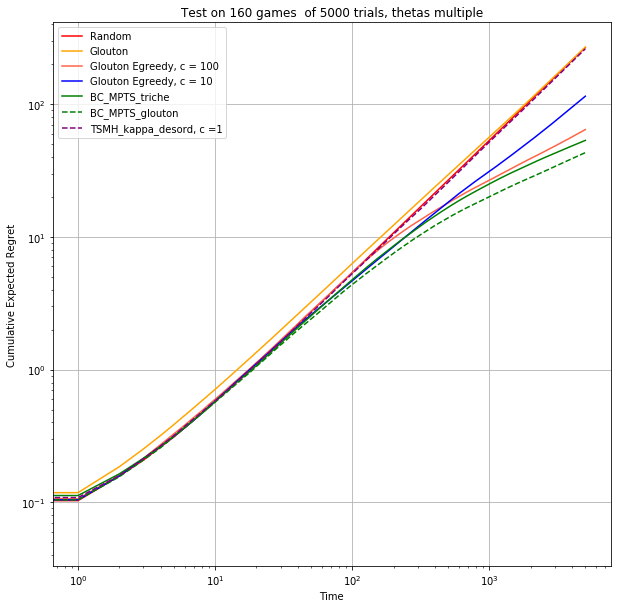

In [18]:
trials = [i for i in range(referee_Oracle_5000trials_20games_thetas1.nb_trials)]
plt.figure(figsize=(10, 10))

plt.plot(trials, np.cumsum(referee_Random_5000trials_20games_thetas1.get_regret_expected(), axis=0)[trials],'r-', label='Random')

plt.plot(trials, np.cumsum(referee_greedy_5000trials_20games_thetas1.get_regret_expected(), axis=0)[trials],'orange', label='greedy')
plt.plot(trials, np.cumsum(referee_greedy_EGreedy_100_5000trials_20games_thetas1.get_regret_expected(), axis=0)[trials],color='tomato', label='greedy Egreedy, c = 100')
plt.plot(trials, np.cumsum(referee_greedy_EGreedy_10_5000trials_20games_thetas1.get_regret_expected(), axis=0)[trials],color='b', label='greedy Egreedy, c = 10')

plt.plot(trials, np.cumsum(referee_BC_MPTS_triche_5000trials_20games_thetas1.get_regret_expected(), axis=0)[trials],'g-', label='BC_MPTS_triche')
plt.plot(trials, np.cumsum(referee_BC_MPTS_greedy_5000trials_20games_thetas1.get_regret_expected(), axis=0)[trials],'g--' ,label='BC_MPTS_greedy')

plt.plot(trials, np.cumsum(referee_TSMH_kappa_desord_1_5000trials_20games_thetas1.get_regret_expected(), axis=0)[trials], color = 'purple', linestyle = '--', label='TSMH_kappa_desord, c =1')

plt.xlabel('Time')
plt.ylabel('Cumulative Expected Regret')
plt.title ('Test on '+ str(nb_game) + ' games  of '+ str(nb_trial)+' trials, thetas multiple')
plt.legend()
plt.grid(True)
plt.loglog()
plt.show()
  

In [ ]:

part0 = [np.array([uniform(0, 1) for i  in range(nb_prop)]), np.array([1]+[uniform(0, 1) for i  in range(1,nb_place)])]
 